<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#About this Sprint" data-toc-modified-id="About this Sprint-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>About this Sprint</a></span><ul class="toc-item"><li><span><a href="#Purpose of Sprint" data-toc-modified-id="Purpose of this Sprint-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Purpose of this Sprint</a></span></li><li><span><a href="#Purpose of this Sprint" data-toc-modified-id="How to learn-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>How to learn</a></span></li></ul></li><li><span><a href="#Scratch SVM" data-toc-modified-id="Scratch SVM-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Scratch SVM</a></span><ul class="toc-item"><li><span><a href="#【Problem 1】 The steepest descent by Lagrange's undecided multiplier method" data-toc-modified-id="【Problem 1】 The steepest descent using Lagrange's undecided multiplier method-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>【Problem 1】The steepest descent by Lagrange's undecided multiplier method</a></span></li><li><span><a href="#【Problem 2】Determining the Support Vectors" data-toc-modified-id="【Problem2】Determining the Support Vectors-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>【Problem 2】Determining the Support Vectors</a></span></li><li><span><a href="#【Problem3】Estimation" data-toc-modified-id="【Problem 3】Estimation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>【Problem 3】Estimation</a></span></li><li><span><a href="#【Problem 4】Learning and Estimation" data-toc-modified-id="【Problem 4】Learning and Estimation-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>【Problem 4】Learning and Estimation</a></span></li><li><span><a href="#【Problem 5】Visualization of the decision area" data-toc-modified-id="【Problem 5】Visualization of the decision area-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>【Problem 5】Visualization of the decision area</a></span></li><li><span><a href="#【Problem 6】（(Advanced Assignment) Creating Polynomial Kernel Functions" data-toc-modified-id="【Problem 6】(Advanced Assignment) Creating Polynomial Kernel Functions-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>【Problem 6】（(Advanced Assignment) Creating Polynomial Kernel Functions</a></span></li><li><span><a href="#Classification of data distributed in a circle" data-toc-modified-id="Classification of data distributed in a circle-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Classification of data distributed in a circle</a></span></li><li><span><a href="#Bonus (Sample data 2)" data-toc-modified-id="Bonus (Sample data 2)-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Bonus（Sample data 2）</a></span></li></ul></li></ul></div>

# Sprint Machine Learning Scratch SVM

## About this Sprint

### Purpose of Sprint
* Understanding SVM through Scratch
* Exposure to linear models and different methods

### How to learn
After implementing the SVM in scratch, we will learn and verify it.

## Scratch SVM

We will create a class of support vector machines (SVMs) for classification from scratch, and implement the algorithm using only minimal libraries such as NumPy.

There are two types of SVMs: soft-margin SVMs, which allow for misclassification during training, and hard-margin SVMs, which do not. We will focus on hard-margin SVMs, which are simpler to implement.

A template is provided below. Please add your code to this ScratchSVMClassifier class.

Two SVM scratches were created.
* Implemented in a for statement with a large amount of calculation ScratchSVMClassifier
* Speed ​​up with some numpy ScratchSVMClassifier (We want to completely eliminate the for statement ... We want to calculate the update of lamda)

In [1]:
class ScratchSVMClassifier():
    """
    Scratch implementation of SVM classifier

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      learning rate
    kernel : str
      Kernel type. Linear kernel (linear) or polynomial kernel (polly)
    threshold : float
      Threshold for selecting support vectors
    verbose : bool
      True if you want to output the learning process.

    Attributes
    ----------
    self.n_support_vectors : int
      Number of support vectors
    self.index_support_vectors : ndarray of the follwoing form, shape (n_support_vectors,)
      Support vectors index
    self.X_sv :  ndarray of the following form, shape(n_support_vectors, n_features)
      Support vectors features
    self.lam_sv :  ndarray of the following form, shape(n_support_vectors, 1)
      Support vector undetermined multiplier
    self.y_sv :  ndarray of the following form, shape(n_support_vectors, 1)
      Support vector labels

    """
    
    def __init__(self, num_iter=100, lr=0.01,
                 kernel='linear', ganma=1, d=1,theta=0,threshold=1e-5,
                 verbose=False):
        
         # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.ganma = ganma
        self.d = d
        self.theta = theta
        
    def _kernel(self,x1,x2):
        """
        Compute kernel functions.
        Parameters
        ----------
        X : ndarray of the following form, shape (n_samples, n_features)
            Training data features
        """
        if self.kernel == 'polly':
            self.ganma = 1
            self.theta = 1
            self.d = 2
            
        return (self.ganma*np.dot(x1,x2.T)+self.theta)**self.d
    
    def _lamda_update(self,X,y):
        
        for i in range(len(X)):
            total = 0
            for j in range(len(X)):
                total += self.lamda[j]*y[i]*y[j]*self._kernel(X[i],X[j])
            
            self.lamda[i] += self.lr*(1-total)
            
            if self.lamda[i] < 0:
                self.lamda[i] = 0
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Train an SVM classifier.。
        If verification data is input, the accuracy against it is also calculated for each iteration.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features) of the following form
            Training data features
        y : ndarray, shape (n_samples, ) of the following form
            Correct answer value of training data
        X_val : 次の形のndarray, shape (n_samples, n_features)
            Validation data features
        y_val : ndarray, shape (n_samples, ) of the following form
            Correct value of validation data
        """
        
        # Set the initial value of λ
        self.lamda = np.random.rand(len(X))
        
        # Unique value of y
        self.ylabel = np.unique(y)
        
        # Replace the label value of y with -1,1
        y = np.where(y==self.ylabel[0],-1,1)
        
        for i in range(self.iter):
            self._lamda_update(X,y)
            
            #Outputs the learning process when verbose is set to true.
            if self.verbose:
                print('iter_n:',i,
                      'lamada:',self.lamda)
        
        # Extraction of support vectors, specifications
        self.index_support_vectors = np.where(self.lamda > self.threshold)
        self.X_sv = X[self.lamda > self.threshold]
        self.n_support_vectors = len(self.X_sv)
        self.lam_sv = self.lamda[self.lamda > self.threshold]
        self.y_sv = y[self.lamda > self.threshold]
            
    def predict(self, X):
        """
        Use SVM classifier to estimate labels.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features) of the following form
            Sample

        Returns
        -------
            ndarray, shape (n_samples, 1) of the following form
            Estimation results by SVM classifier
        """
        y_pred = np.zeros(len(X))
        
        for i in range(len(X)):
            total = 0
            for j in range(self.n_support_vectors):
                total += self.lam_sv[j]*self.y_sv[j]*self._kernel(X[i],self.X_sv[j])
            
            if total >= 0:
                y_pred[i] = self.ylabel[1]
            else:
                y_pred[i] = self.ylabel[0]
                
        return y_pred

In [2]:
class ScratchSVMClassifierNumpy():
    """
    Scratch implementation of SVM classifier

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      learning rate
    kernel : str
      Kernel type. Linear kernel (linear) or polynomial kernel (polly)
    threshold : float
      Threshold for selecting support vectors
    verbose : bool
      True if you want to output the learning process.

    Attributes
    ----------
    self.n_support_vectors : int
      Number of support vectors
    self.index_support_vectors : ndarray, shape (n_support_vectors,) of the following form
      Support vectors index
    self.X_sv :  ndarray, shape(n_support_vectors, n_features) of the following form
      Support vectors features
    self.lam_sv : ndarray, shape(n_support_vectors, 1) of the following form
      Undecided multiplier of support vector
    self.y_sv :  ndarray, shape(n_support_vectors, 1) of the following form
      Support vector labels

    """
    
    def __init__(self, num_iter=100, lr=0.01,
                 kernel='linear', ganma=1, d=1,theta=0,threshold=1e-5,
                 verbose=False):
        
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.ganma = ganma
        self.theta = theta
        self.d = d
        
    def _kernel(self,x1,x2):
        """
        Compute kernel functions.
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features) of the following form
            Training data features
        """
        if self.kernel == 'polly':
            self.ganma = 1
            self.theta = 1
            self.d = 2
            
        return (self.ganma*np.dot(x1,x2.T)+self.theta)**self.d
    
    def _lamda_update(self,X,y):
        for i in range(len(X)):
            self.lamda[i] += self.lr*(1-np.dot(self.lamda*y[i]*y.T, self._kernel(X[i],X)))
            self.lamda = np.where(self.lamda >= 0,self.lamda,0)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Train an SVM classifier。
        If verification data is input, the accuracy against it is also calculated for each iteration.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features) of the following form
            Training data features
        y : ndarray, shape (n_samples, ) of the following form
            Correct answer value of training data
        X_val : ndarray, shape (n_samples, n_features) of the following form
            Validation data features
        y_val : ndarray, shape (n_samples, ) of the following form
            Correct value of validation data
        """
        
        # Set the initial value of λ
        self.lamda = np.random.rand(len(X))
        
        # Unique value of y
        self.ylabel = np.unique(y)
        
        # Replace the label value of y with -1,1
        y = np.where(y==self.ylabel[0],-1,1)
        
        for i in range(self.iter):
            self._lamda_update(X,y)
            
            #Outputs the learning process when verbose is set to true.
            if self.verbose:
                print()
        
        # Extraction of support vectors, specifications
        self.index_support_vectors = np.where(self.lamda > self.threshold)
        self.X_sv = X[self.lamda > self.threshold]
        self.n_support_vectors = len(self.X_sv)
        self.lam_sv = self.lamda[self.lamda > self.threshold]
        self.y_sv = y[self.lamda > self.threshold]
            
    def predict(self, X):
        """
        Use SVM classifier to estimate labels.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features) of the following form
            Sample

        Returns
        -------
            ndarray, shape (n_samples, 1) of the following form
            Estimation results by SVM classifier
        """
        y_pred = np.dot(self.lam_sv*self.y_sv,self._kernel(X,self.X_sv).T)
                
        return np.where(y_pred >= 0,self.ylabel[1],self.ylabel[0])

### 【Problem 1】The steepest descent by Lagrange's undecided multiplier method

For training the SVM, we use the Lagrange's undecided multiplier method.  
Prepare a Lagrange multiplier λ for the number of samples, and update it using the following formula.  
Implement the method to perform this calculation in the ScratchSVMClassifier class.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

* Use Simple Data Set 1 (from Sprint2)

In [4]:
np.random.seed(seed=0)

# n_samples = 500
n_samples = 100
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))),
                    np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
sample1_X = X[random_index]
sample1_y = y[random_index]

In [5]:
# Test with a small sample
x = sample1_X[20:40]
y = sample1_y[20:40]
print(x)
print(y)

[[ 2.55988095 -0.09906791]
 [-0.14205902  2.11124362]
 [-1.50642737  2.11125339]
 [-1.16513883  1.40174924]
 [-1.5615169   1.88535921]
 [-1.585383    0.94523063]
 [-1.00408384  2.76905831]
 [-2.46267867 -0.08076347]
 [-0.17950815  3.39022454]
 [ 0.63968522 -3.21271245]
 [-2.54738211  1.21306967]
 [-2.69336749 -0.61318911]
 [ 2.4982956   0.72754957]
 [ 1.91346848 -2.09976175]
 [ 1.00740032 -1.47176993]
 [ 3.43738711 -0.53961192]
 [ 3.14206286  0.31096066]
 [ 0.31731679  2.22551981]
 [ 2.7656298   0.19670802]
 [-0.55952028 -2.96217901]]
[-1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1]


In [6]:
# Generate a random number from 0 to 1
lamda = np.random.rand(len(x))
lamda.reshape(-1,1)

array([[0.52459262],
       [0.44201532],
       [0.85263492],
       [0.43343897],
       [0.82687037],
       [0.50934207],
       [0.08637698],
       [0.66003986],
       [0.20659461],
       [0.84727532],
       [0.68135913],
       [0.17836735],
       [0.06985902],
       [0.00968817],
       [0.89204966],
       [0.13346521],
       [0.77919197],
       [0.92516343],
       [0.71517875],
       [0.49081861]])

In [9]:
# Manual Iteration
num_iter = 20
for _ in range(num_iter):
    for i in range(len(x)):
        total = 0
        for j in range(len(x)):
            total += lamda[j]*y[i]*y[j]*np.dot(x[i],x[j])
        
        lamda[i] += 0.01*(1-total)
    
        if lamda[i] < 0:
            lamda[i] = 0
            
print('lamda:\n',lamda.reshape(-1,1))

lamda:
 [[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.03668654]
 [0.20599905]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.30779643]
 [0.        ]
 [0.        ]]


In [10]:
num_iter = 100

for _ in range(num_iter):
    for i in range(len(x)):
        total = 0
        for j in range(len(x)):
            total += lamda[j]*y[i]*y[j]*np.dot(x[i],x[j])
        
        lamda[i] += 0.01*(1-total)
    
        if lamda[i] < 0:
            lamda[i] = 0
            
print('lamda:\n',lamda.reshape(-1,1))

lamda:
 [[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.26131761]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.32128085]
 [0.        ]
 [0.        ]]


In [11]:
# Utilize numpy
xx = np.array([[1,2],
               [1,2],
               [2,4],
               [2,4]])

np.dot(xx[1],xx.T)

array([ 5,  5, 10, 10])

In [12]:
a=np.dot(x[0],x.T)
print(a)

[ 6.56280495 -0.57281068 -4.06543221 -3.12148507 -4.18407598 -4.15203376
 -2.84465992 -6.29616316 -0.79538197  1.95579473 -6.64117124 -6.83395278
  6.32326249  5.10627053  2.72463005  8.85276001  8.01250064  0.5918156
  7.06019559 -1.13884843]


In [13]:
b=lamda*y[0]*y
print(b)

[ 0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.         -0.         -0.
  0.26131761  0.          0.          0.          0.         -0.32128085
  0.          0.        ]


In [14]:
a*b

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.65237982,  0.        ,  0.        ,
        0.        ,  0.        , -0.19013902,  0.        , -0.        ])

In [15]:
np.sum(a*b)

1.462240795557881

In [16]:
np.dot(a,b)

1.462240795557881

In [17]:
c = np.dot(x,x.T)
print(c.shape)

(20, 20)


In [18]:
d = lamda*y*y.T
print(d.shape)

(20,)


In [19]:
np.dot(c,d)

array([ 1.84251884,  1.80374207,  0.77393054,  0.38933445,  0.52788366,
       -0.34107688,  1.74850215, -1.9319232 ,  2.93313035, -2.42511733,
       -0.82475897, -2.5879652 ,  2.54423766, -0.45629584, -0.57177333,
        2.10610405,  2.65308027,  2.25391305,  2.26553549, -3.10350592])

* If we use all matrix calculations, we can't choose the support vectors well because we can't update λ every time (we don't know how).
* Give up and use a one-loop for statement.

### 【Problem 2】Determining support vectors
Samples for which the calculated Lagrange multiplier λ is greater than a set threshold are treated as support vectors.  
Support vectors are required during estimation.  
Write code to determine the support vectors and keep them as instance variables.  
  
The threshold value is a hyperparameter, but it is a good idea to start with about 1e-5.  
The number of support vectors should be output so that you can check if the learning is successful.

In [20]:
# Extract samples with λ greater than a threshold value
threshold = 1e-5
spt_vec = x[lamda > threshold]
print(spt_vec)

[[2.4982956  0.72754957]
 [0.31731679 2.22551981]]


In [21]:
# Get the index
spt_index = np.where(lamda > threshold)
print(spt_index)

(array([12, 17]),)


In [22]:
# Get the λ and label values of the support vector
spt_lamda = lamda[lamda > 0]
spt_y = y[lamda > 0]
print(spt_lamda)
print(spt_y)

[0.26131761 0.32128085]
[-1  1]


### 【Problem 3】Estimation

In [23]:
# test data
x_test = x[0:5]
x_test

array([[ 2.55988095, -0.09906791],
       [-0.14205902,  2.11124362],
       [-1.50642737,  2.11125339],
       [-1.16513883,  1.40174924],
       [-1.5615169 ,  1.88535921]])

In [24]:
for i in range(len(x_test)):
    total = 0
    for j in range(len(spt_vec)):
        total += spt_lamda[j]*spt_y[j]*np.dot(x_test[i],spt_vec[j])
    
    if total > 0:
        print('f(x):{:.1f}, class:{}'.format(total,1))
    else:
        print('f(x):{:.1f}, class:{}'.format(total,-1))

f(x):-1.5, class:-1
f(x):1.2, class:1
f(x):1.9, class:1
f(x):1.4, class:1
f(x):1.8, class:1


### 【Problem 4】Learning and Estimation
Train and estimate the scratch implementation on the binary classification of simple dataset 1 prepared in Sprint of Introduction to Machine Learning Scratch.

Compare it with the scikit-learn implementation and check if it works correctly.

Use scikit-learn for the indicator values such as Accuracy, Precision, and Recall.

* Try training and estimation with simple data 1

In [25]:
np.random.seed(seed=0)

n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))),
                    np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
sample1_X = X[random_index]
sample1_y = y[random_index]

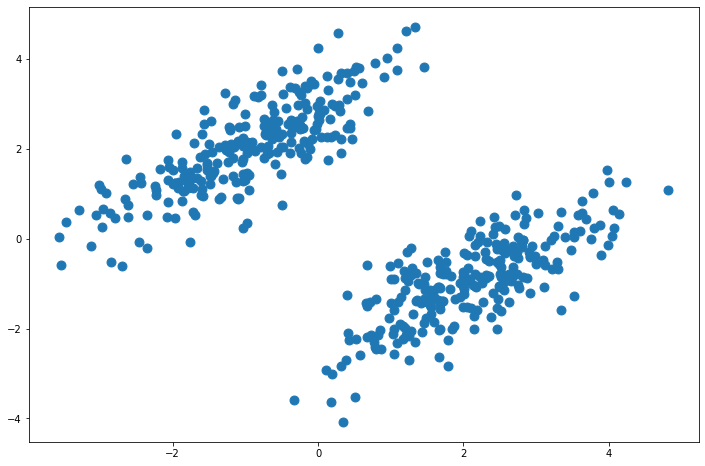

In [26]:
# Visualizing Simple Data 1
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.scatter(sample1_X[:,0],sample1_X[:,1],s=80);

In [27]:
from sklearn.model_selection import train_test_split
X = sample1_X
y = sample1_y

X_train1, X_valid1, y_train1, y_valid1 = \
train_test_split(X,y,train_size=0.8,random_state=0)

print('X_train.shape:',X_train1.shape)
print('y_train.shape:',y_train1.shape)
print('X_valid.shape:',X_valid1.shape)
print('y_valid.shape:',y_valid1.shape)

X_train.shape: (400, 2)
y_train.shape: (400,)
X_valid.shape: (100, 2)
y_valid.shape: (100,)


In [28]:
# Train and estimate with scratch model
clf1 = ScratchSVMClassifier(num_iter=100, lr=0.01,)

clf1.fit(X_train1,y_train1)
y_pred1 = clf1.predict(X_valid1)

In [29]:
Show = False

if Show:
    print('PRED:',y_pred1)
    print('VALI:',y_valid1)

In [30]:
# Evaluation index
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_valid1, y_pred1)
precision = precision_score(y_valid1, y_pred1)
recall = recall_score(y_valid1, y_pred1)
f1 = f1_score(y_valid1, y_pred1)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 1.0
precision 1.0
recall 1.0
f1 1.0


* Scratch models can also do the classification without problems.

In [31]:
# Train and estimate with sklearn model
from sklearn.svm import SVC
clf_sk = SVC()

clf_sk.fit(X_train1,y_train1)

y_pred_sk = clf_sk.predict(X_valid1)

In [32]:
accuracy = accuracy_score(y_valid1, y_pred_sk)
precision = precision_score(y_valid1, y_pred_sk)
recall = recall_score(y_valid1, y_pred_sk)
f1 = f1_score(y_valid1, y_pred_sk)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 1.0
precision 1.0
recall 1.0
f1 1.0


### 【Problem 5】Visualization of the decision area
Visualize the decision region.  
The support vectors should be shown in different colors, as in the following example.

In [33]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X,y,model,step=0.01,
                    title='decision region',
                    xlabel='xlabel',
                    ylabel='ylabel',
                    target_names=['versicolor', 'virginica']):
    
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5,
                                              np.max(X[:,0])+0.5, step),
                                    np.arange(np.min(X[:,1])-0.5,
                                              np.max(X[:,1])+0.5, step))
    
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=5, alpha=0.5)
    
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0],
                    X[y==target][:, 1],
                    s=80,
                    color=scatter_color[i],
                    label=target_names[i], marker='o')
    
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.scatter(model.X_sv[:,0],model.X_sv[:,1],color='yellow',s=80,label='support_vector')
    plt.legend(handles=patches)
    plt.legend()

Number of Support_vactor: 9


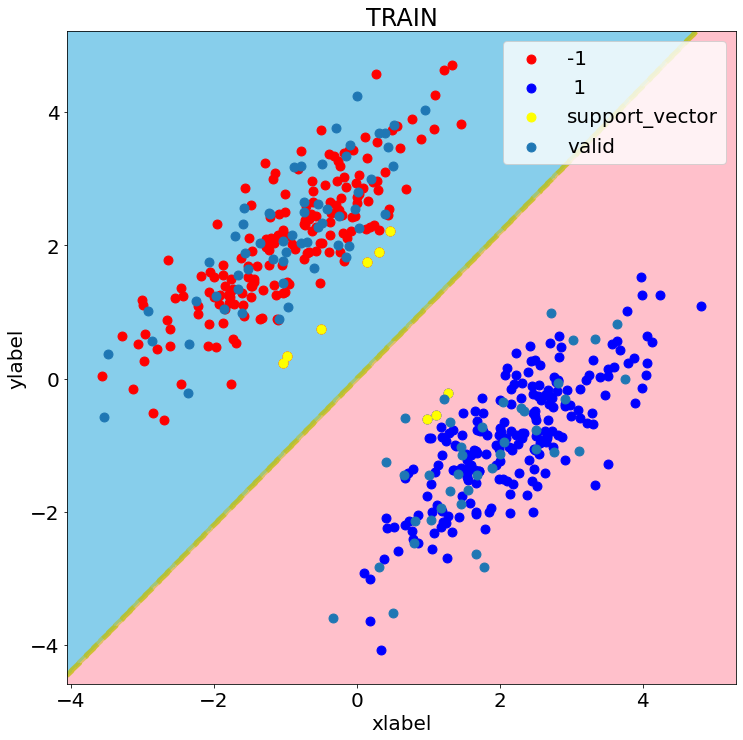

In [34]:
fit,ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
print('Number of Support_vactor:',clf1.n_support_vectors)
decision_region(X_train1,y_train1,clf1,title='TRAIN',target_names=['-1', ' 1'])
plt.scatter(X_valid1[:,0],X_valid1[:,1],s=80,label='valid')
plt.legend();

* Also checked with a scratch SVM class for matrix calculations

In [35]:
clfnp = ScratchSVMClassifierNumpy(num_iter=100, lr=0.01, threshold=1e-5)
clfnp.fit(X_train1,y_train1)
y_pred_clfnp = clfnp.predict(X_valid1)

In [36]:
accuracy = accuracy_score(y_valid1, y_pred_clfnp)
precision = precision_score(y_valid1, y_pred_clfnp)
recall = recall_score(y_valid1, y_pred_clfnp)
f1 = f1_score(y_valid1, y_pred_clfnp)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 1.0
precision 1.0
recall 1.0
f1 1.0


Number of Support_vactor: 9


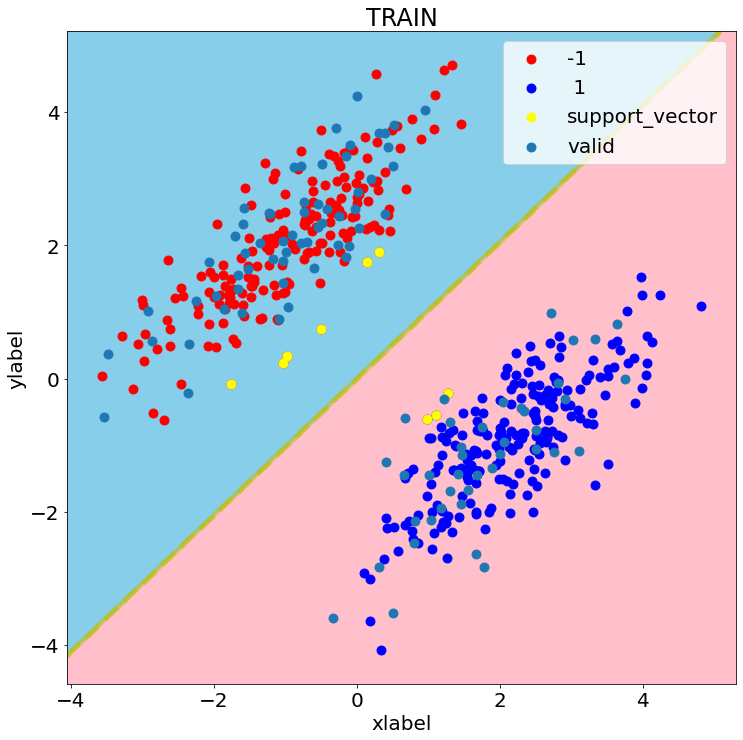

In [37]:
fit,ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
print('Number of Support_vactor:',clfnp.n_support_vectors)
decision_region(X_train1,y_train1,clfnp,title='TRAIN',target_names=['-1', ' 1'])
plt.scatter(X_valid1[:,0],X_valid1[:,1],s=80,label='valid')
plt.legend();

### 【Problem 6】(Advanced Assignment) Creating Polynomial Kernel Functions

* Simple data 1 is trained and estimated using polynomial kernel

In [38]:
clf4 = ScratchSVMClassifierNumpy(kernel='polly',d=2)
clf4.fit(X_train1,y_train1)
y_pred4 = clf4.predict(X_valid1)

Number of Support_vactor: 9


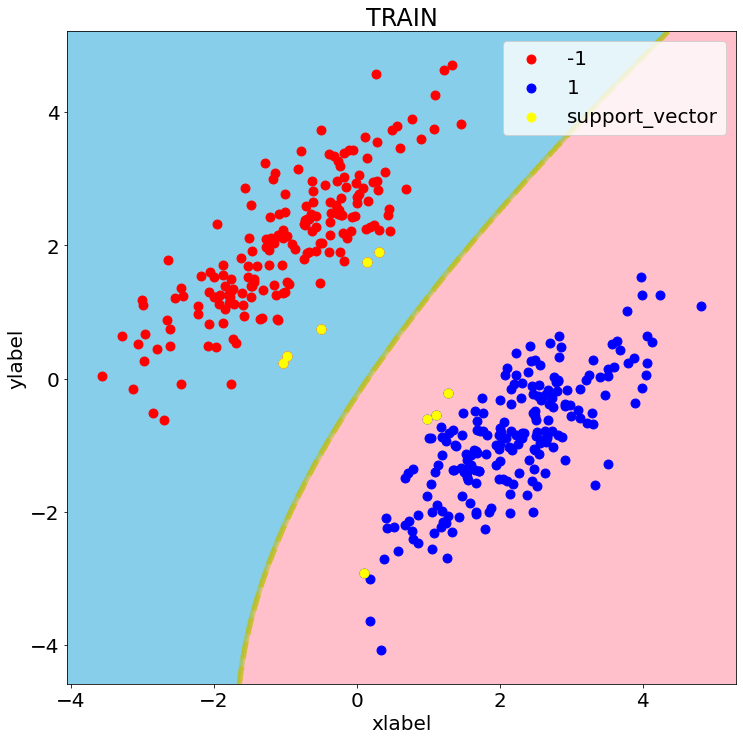

In [39]:
fit,ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
print('Number of Support_vactor:',clf4.n_support_vectors)
decision_region(X_train1,y_train1,clf4,title='TRAIN',target_names=['-1','1'])
#plt.scatter(X_valid1[:,0],X_valid1[:,1],s=80,label='valid')
plt.legend();

In [40]:
# Checking polynomial kernels
x = np.array([[2,1],
              [2,2]])

y = np.array([[3,8],
              [9,1]])

print('linear:\n',np.dot(x,y))
print('polly:\n',(np.dot(x,y)+1)**2)

linear:
 [[15 17]
 [24 18]]
polly:
 [[256 324]
 [625 361]]


### Classification of data distributed in a circle

In [41]:
# Circle class 1 data set
n =300

rs = np.random.random(n)
r = 1.0
X1 = np.c_[r * np.cos(2*np.pi*rs), r * np.sin(2*np.pi*rs)]
Y1 = [-1 for _ in range(n)]

rs = np.random.random(n)
r = 2.0
X2 = np.c_[r * np.cos(2*np.pi*rs), r * np.sin(2*np.pi*rs)]
Y2 = [1 for _ in range(n)]

X = np.r_[X1, X2]
y = np.r_[Y1, Y2]

In [42]:
X_train3, X_valid3, y_train3, y_valid3 = \
train_test_split(X,y,train_size=0.8,random_state=0)

print('X_train.shape:',X_train3.shape)
print('y_train.shape:',y_train3.shape)
print('X_valid.shape:',X_valid3.shape)
print('y_valid.shape:',y_valid3.shape)

X_train.shape: (480, 2)
y_train.shape: (480,)
X_valid.shape: (120, 2)
y_valid.shape: (120,)


In [43]:
clf3 = ScratchSVMClassifierNumpy(kernel='polly',d=2)
clf3.fit(X_train3,y_train3)
y_pred3 = clf3.predict(X_valid3)

Number of Support_vactor: 25


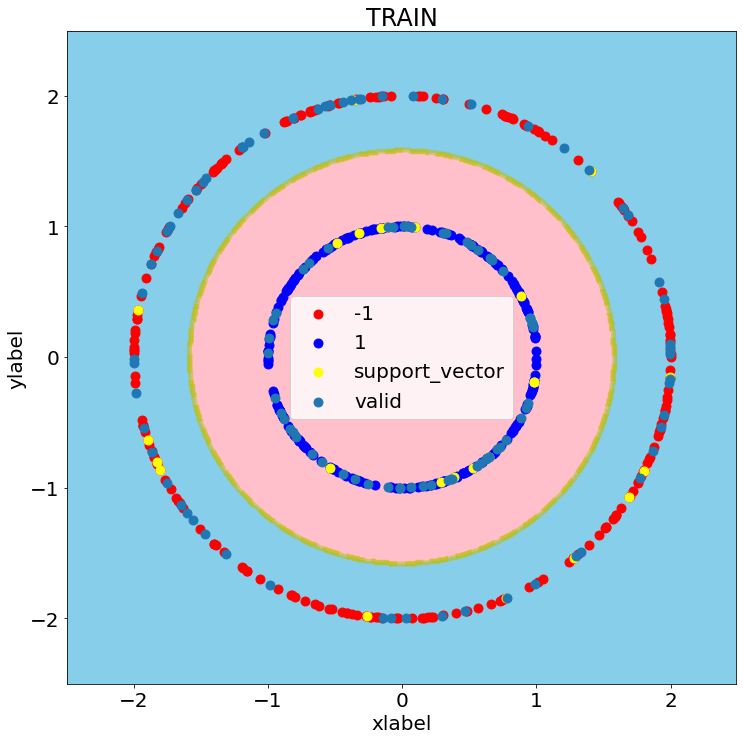

In [44]:
fit,ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
print('Number of Support_vactor:',clf3.n_support_vectors)
decision_region(X_train3,y_train3,clf3,title='TRAIN',target_names=['-1','1'])
plt.scatter(X_valid3[:,0],X_valid3[:,1],s=80,label='valid')
plt.legend();

In [45]:
# Compute feature vectors for polynomial kernels
from scipy.special import comb

def poly_feature(x, d): 
    z = np.zeros((x.shape[0], d+1))
    
    for i in range(d+1):
        # binomial theorem
        a = np.sqrt(comb(d, i, exact=True))
        z[:,i] = a * (x[:,0]**(d-i)) * (x[:,1]**(i))
    return z

In [86]:
import pandas as pd

d = 2

columns = ['feature'+str(i) for i in range(d+1)]
z = pd.DataFrame(poly_feature(X,d),columns=columns)
y = pd.DataFrame(y).rename(columns={0:"class"})
z = pd.concat([z,y],axis=1)

In [87]:
z

,feature0,feature1,feature2,class
0,0.023743,-0.215312,0.976257,-1
1,0.415001,-0.696814,0.584999,-1
2,0.064207,-0.346653,0.935793,-1
3,0.118606,0.457249,0.881394,-1
4,0.236540,-0.600981,0.763460,-1
...,...,...,...,...
595,2.788060,-2.599601,1.211940,1
596,0.301309,-1.492950,3.698691,1
597,3.222904,-2.238082,0.777096,1
598,0.235357,-1.331192,3.764643,1


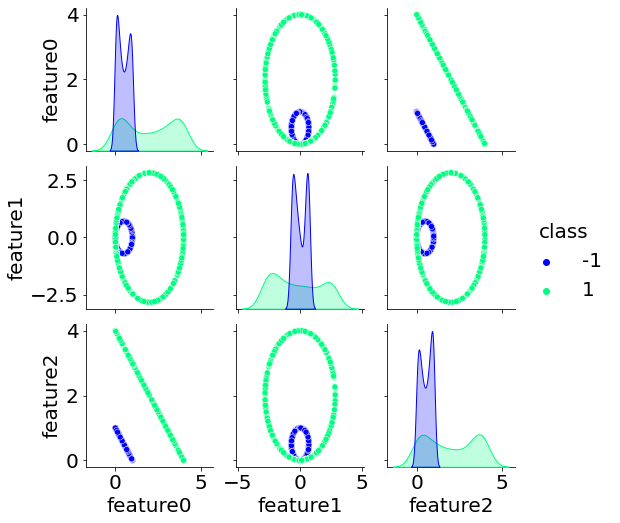

In [88]:
import seaborn as sns
sns.pairplot(z,hue='class',palette='winter');

* The combination of features 0,2 seems to be linearly separable

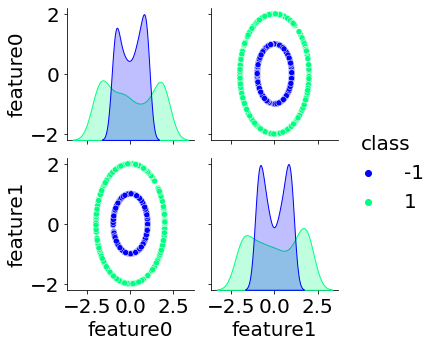

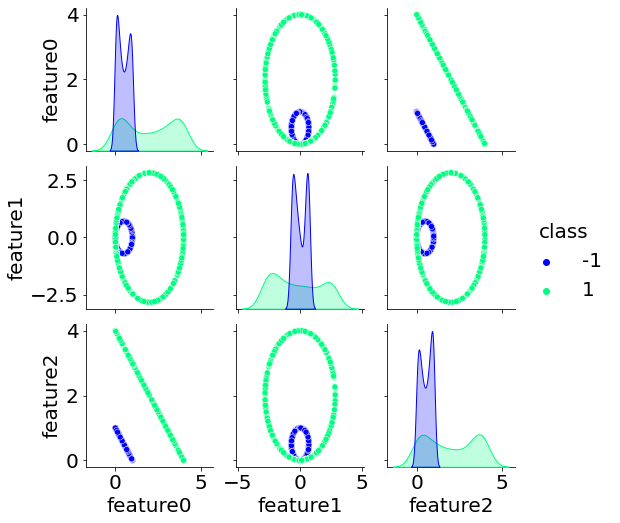

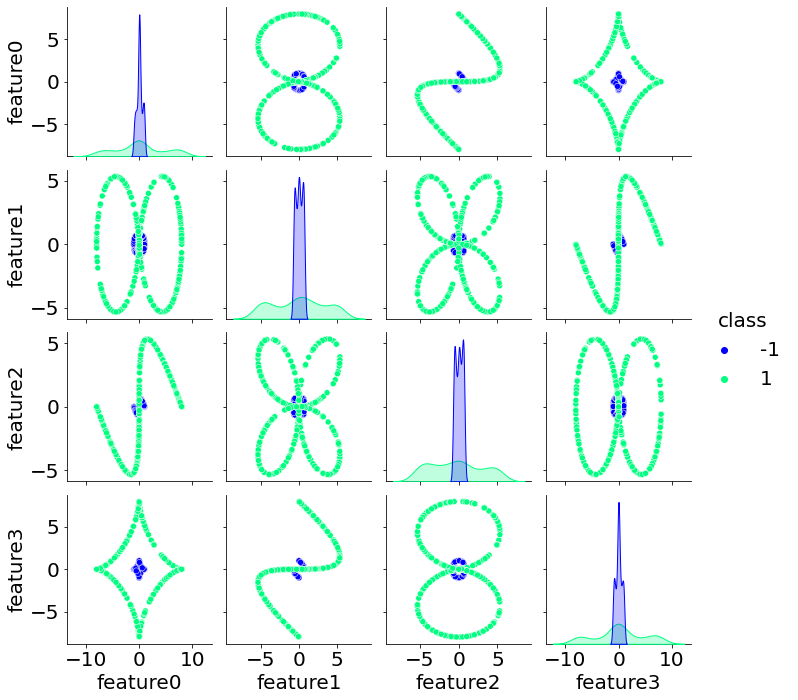

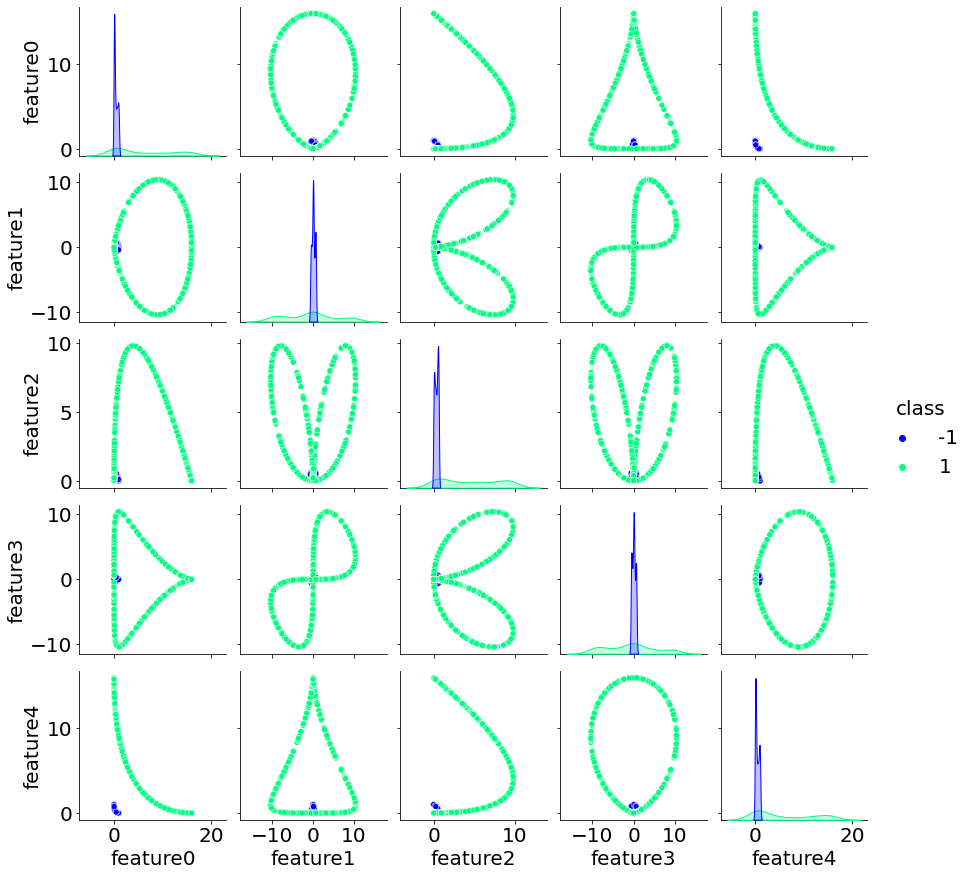

In [89]:
# Visualize 1 to 4 dimensions
for d in range(1,5):
    columns = ['feature'+str(i) for i in range(d+1)]
    z = pd.DataFrame(poly_feature(X,d),columns=columns)
    y = pd.DataFrame(y).rename(columns={0:"class"})
    z = pd.concat([z,y],axis=1)   
    
    sns.pairplot(z,hue='class',palette='winter');

* 2,4 seem to be linearly separable
* 1,3 can't be linearly separated

* Using the kernel trick, we can classify these higher dimensionalized features without computing them. It looks like...

### Bonus (Simple Data 2)

* Try training and estimation with Simple Data 2

In [90]:
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
              [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
              [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
              [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
              [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
              [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
              [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
              [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
              [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
              [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
              [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
              [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
              [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
              [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
              [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
              [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
              [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
              [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
              [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
              [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

sample2_X = X
sample2_y = y

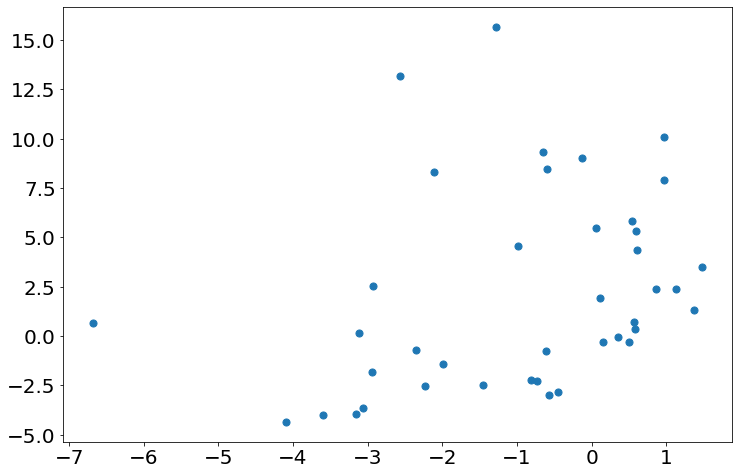

In [91]:
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.scatter(sample2_X[:,0],sample2_X[:,1],s=50);

In [92]:
X = sample2_X
y = sample2_y

X_train2, X_valid2, y_train2, y_valid2 = \
train_test_split(X,y,train_size=0.8,random_state=0)

print('X_train.shape:',X_train2.shape)
print('y_train.shape:',y_train2.shape)
print('X_valid.shape:',X_valid2.shape)
print('y_valid.shape:',y_valid2.shape)

X_train.shape: (32, 2)
y_train.shape: (32,)
X_valid.shape: (8, 2)
y_valid.shape: (8,)


In [93]:
clfnp_polly = ScratchSVMClassifierNumpy(num_iter=100,kernel='polly',d=3)
clfnp_polly.fit(X_train2,y_train2)
y_pred_clfnp_polly = clfnp_polly.predict(X_valid2)

<ipython-input-2-534c2436af56>:64: RuntimeWarning: invalid value encountered in double_scalars
  self.lamda[i] += self.lr*(1-np.dot(self.lamda*y[i]*y.T, self._kernel(X[i],X)))


In [94]:
accuracy = accuracy_score(y_valid2, y_pred_clfnp_polly)
precision = precision_score(y_valid2, y_pred_clfnp_polly)
recall = recall_score(y_valid2, y_pred_clfnp_polly)
f1 = f1_score(y_valid2, y_pred_clfnp_polly)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 0.375
precision 0.0
recall 0.0
f1 0.0


Number of Support_vactor: 18


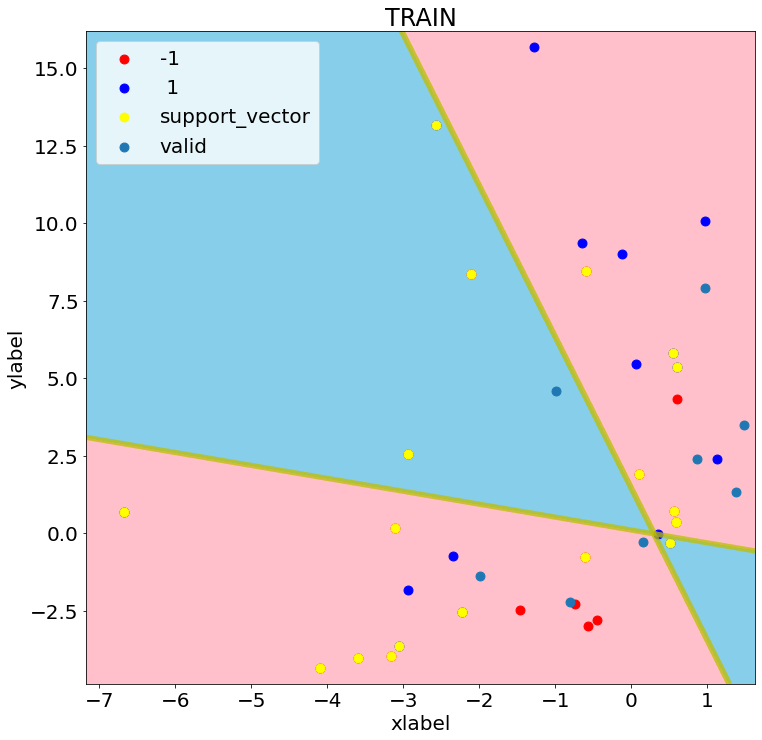

In [95]:
fit,ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
print('Number of Support_vactor:',clfnp_polly.n_support_vectors)
decision_region(X_train2,y_train2,clfnp_polly,title='TRAIN',target_names=['-1', ' 1'])
plt.scatter(X_valid2[:,0],X_valid2[:,1],s=80,label='valid')
plt.legend();

* We are not doing a good job of classifying them.